# Predicción del precio de la vivienda
## California Housing Dataset
En este notebook se hace uso del dataset "California Housing" para explicar, paso a paso, el flujo de trabajo en Machine Learning
- - -
### Importación de librerías
En primer lugar, se deben importar todas las librerías que se necesiten para realizar el estudio. En este caso, las librerías que se van a usar son:
- Pandas
- MatPlotLib
- Seaborn
- ipywidgets
- IPython
- scikit-learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

### Carga del dataset
Lectura del archivo de datos (CSV, Excel, etc.) en un DataFrame de pandas, creando la estructura principal sobre la que se trabajará. En este caso, se carga el dataset "California Housing"

In [2]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="MedianHouseValue")

df = X.copy()
df["MedianHouseValue"] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Exploración
Análisis inicial del dataset para comprender su estructura: dimensiones, tipos de datos, valores nulos, estadísticas descriptivas y visualizaciones para identificar patrones o anomalías.

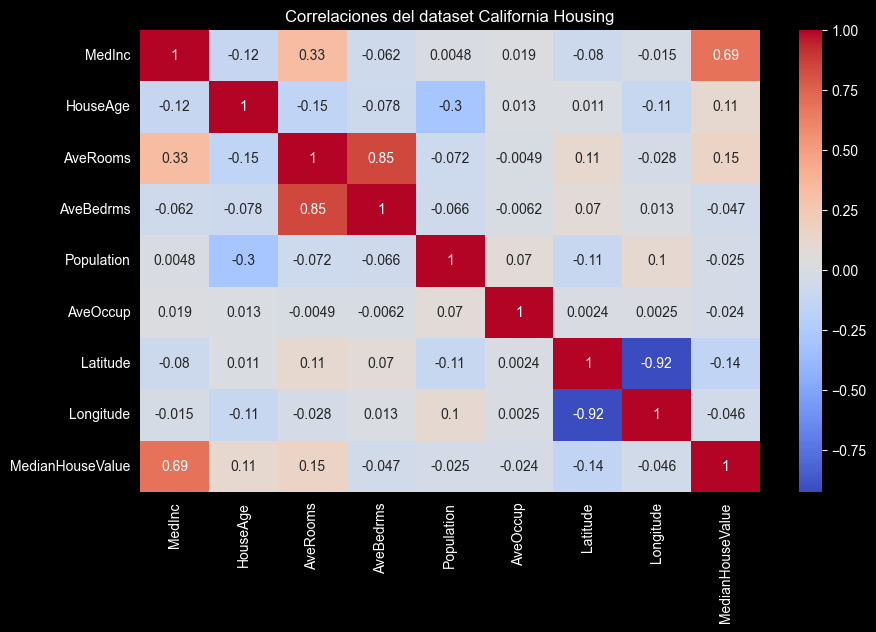

In [3]:
df.describe()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlaciones del dataset California Housing")
plt.show()

### Separación de datos
División del dataset en conjuntos de entrenamiento y prueba (a veces también validación) para asegurar una evaluación robusta de los modelos y evitar sobreajuste.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Entrenamiento de modelos
Aplicación de uno o varios algoritmos de Machine Learning (como regresión, clasificación o clustering) al conjunto de entrenamiento para que aprendan patrones y relaciones en los datos. En este estudio se han usado:
- Regresión lineal
- Árbol de decisión
- K vecinos más cercanos
- SVR
- Random Forest

In [5]:
# Regresión Lineal
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

# Árbol de decisión
model_tree = DecisionTreeRegressor(max_depth=6, random_state=42)
model_tree.fit(X_train, y_train)

# K-Nearest Neighbors
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)

# SVR
model_svr = SVR(kernel="rbf")
model_svr.fit(X_train_scaled, y_train)

# Random Forest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Evaluación de modelos
Medición del rendimiento de los modelos entrenados usando métricas adecuadas (precisión, recall, MSE, etc.) y el conjunto de prueba, comparando resultados para seleccionar el mejor modelo.

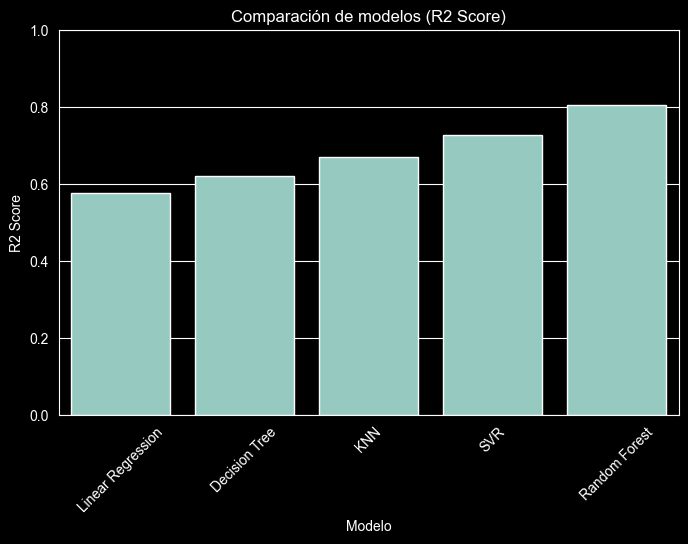

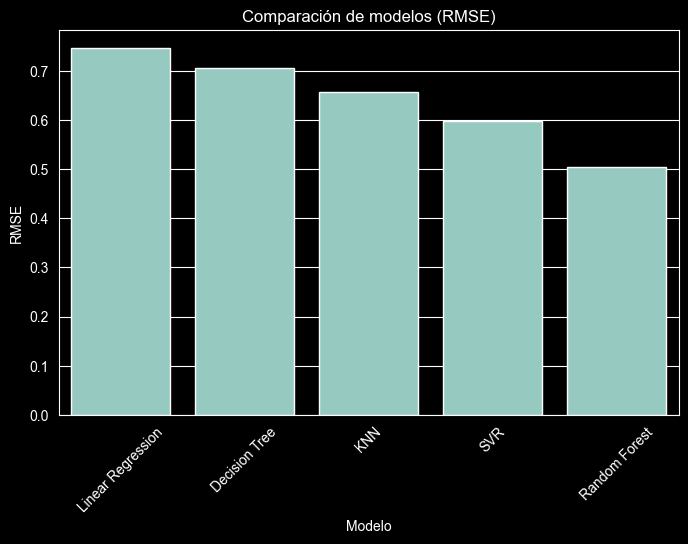

In [6]:
def evaluar(modelo, X, y):
    pred = modelo.predict(X)
    rmse = mean_squared_error(y, pred) ** 0.5
    r2 = r2_score(y, pred)
    return rmse, r2

resultados = pd.DataFrame({
    "Modelo": ["Linear Regression", "Decision Tree", "KNN", "SVR", "Random Forest"],
    "RMSE": [
        evaluar(model_lr, X_test_scaled, y_test)[0],
        evaluar(model_tree, X_test, y_test)[0],
        evaluar(model_knn, X_test_scaled, y_test)[0],
        evaluar(model_svr, X_test_scaled, y_test)[0],
        evaluar(model_rf, X_test, y_test)[0],
    ],
    "R2 Score": [
        evaluar(model_lr, X_test_scaled, y_test)[1],
        evaluar(model_tree, X_test, y_test)[1],
        evaluar(model_knn, X_test_scaled, y_test)[1],
        evaluar(model_svr, X_test_scaled, y_test)[1],
        evaluar(model_rf, X_test, y_test)[1],
    ]
})

# Gráfica comparativa de R2
plt.figure(figsize=(8,5))
sns.barplot(data=resultados, x="Modelo", y="R2 Score")
plt.title("Comparación de modelos (R2 Score)")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Gráfica comparativa de RMSE
plt.figure(figsize=(8,5))
sns.barplot(data=resultados, x="Modelo", y="RMSE")
plt.title("Comparación de modelos (RMSE)")
plt.xticks(rotation=45)
plt.show()

### Extra - Widgets interactivos
Implementación de elementos interactivos (con ipywidgets) para permitir ajustar parámetros, visualizar predicciones o explorar el modelo de manera dinámica sin modificar el código directamente.

In [7]:
sliders = {}
for feature in X.columns:
    sliders[feature] = widgets.FloatSlider(
        value=float(X[feature].mean()),
        min=float(X[feature].min()),
        max=float(X[feature].max()),
        step=0.1,
        description=feature
    )

output = widgets.Output()

def actualizar(change=None):
    with output:
        output.clear_output()
        valores = [sliders[f].value for f in X.columns]
        valores_scaled = scaler.transform([valores])
        pred = model_rf.predict([valores])[0]  # random forest
        print(f"🏠 Valor estimado: ${pred * 100000:,.0f}")

for s in sliders.values():
    s.observe(actualizar, names='value')

display(*sliders.values(), output)
actualizar()


FloatSlider(value=3.8706710029069766, description='MedInc', max=15.0001, min=0.4999)

FloatSlider(value=28.639486434108527, description='HouseAge', max=52.0, min=1.0)

FloatSlider(value=5.428999742190376, description='AveRooms', max=141.9090909090909, min=0.8461538461538461)

FloatSlider(value=1.096675149606208, description='AveBedrms', max=34.06666666666667, min=0.3333333333333333)

FloatSlider(value=1425.4767441860465, description='Population', max=35682.0, min=3.0)

FloatSlider(value=3.0706551594363742, description='AveOccup', max=1243.3333333333333, min=0.6923076923076923)

FloatSlider(value=35.63186143410852, description='Latitude', max=41.95, min=32.54)

FloatSlider(value=-119.56970445736432, description='Longitude', max=-114.31, min=-124.35)

Output()